<a href="https://colab.research.google.com/github/Aanchalgaur/R/blob/main/PASTING_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('e1071')
install.packages('caret')
install.packages('rpart')
install.packages('ipred')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)       #for data wrangling
library(e1071)       #for calculating variable importance
library(caret)       #for general model fitting
library(rpart)       #for fitting decision trees
library(ipred)       #for fitting bagged decision trees

In [ ]:
airquality

Ozone,Solar.R,Wind,Temp,Month,Day
<int>,<int>,<dbl>,<int>,<int>,<int>
41,190,7.4,67,5,1
36,118,8.0,72,5,2
12,149,12.6,74,5,3
18,313,11.5,62,5,4
NA,NA,14.3,56,5,5
28,NA,14.9,66,5,6
23,299,8.6,65,5,7
19,99,13.8,59,5,8
8,19,20.1,61,5,9


In [ ]:
set.seed(1)

In [ ]:
data = airquality

In [ ]:
sum(is.na(data))

[1] 44

In [ ]:
df= na.omit(data)

In [ ]:
sum(is.na(df))

[1] 0

In [ ]:
str(df)

'data.frame':	111 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 23 19 8 16 11 14 ...
 $ Solar.R: int  190 118 149 313 299 99 19 256 290 274 ...
 $ Wind   : num  7.4 8 12.6 11.5 8.6 13.8 20.1 9.7 9.2 10.9 ...
 $ Temp   : int  67 72 74 62 65 59 61 69 66 68 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 7 8 9 12 13 14 ...
 - attr(*, "na.action")= 'omit' Named int [1:42] 5 6 10 11 25 26 27 32 33 34 ...
  ..- attr(*, "names")= chr [1:42] "5" "6" "10" "11" ...


In [ ]:
df

,Ozone,Solar.R,Wind,Temp,Month,Day
,<int>,<int>,<dbl>,<int>,<int>,<int>
1,41,190,7.4,67,5,1
2,36,118,8.0,72,5,2
3,12,149,12.6,74,5,3
4,18,313,11.5,62,5,4
7,23,299,8.6,65,5,7
8,19,99,13.8,59,5,8
9,8,19,20.1,61,5,9
12,16,256,9.7,69,5,12
13,11,290,9.2,66,5,13


In [ ]:
parts = createDataPartition(df$Ozone, p = .80, list = F)
train = df[parts, ]
test = df[-parts, ]

In [ ]:
dim(test)

[1] 21  6

In [ ]:
dim(train)

[1] 90  6

In [ ]:
set.seed(1)

In [ ]:
bag <- bagging(
  formula = Ozone ~ .,
  data = train,
  nbagg = 150, 
  bootstrap= FALSE,  
  coob = TRUE,
  control = rpart.control(minsplit = 2, cp = 0)
)

Note that we chose to use 150 bootstrapped samples to build the bagged model and we specified coob to be TRUE to obtain the estimated out-of-bag error

In [ ]:
bag


Bagging regression trees with 150 bootstrap replications 

Call: bagging.data.frame(formula = Ozone ~ ., data = train, nbagg = 150, 
    bootstrap = FALSE, coob = TRUE, control = rpart.control(minsplit = 2, 
        cp = 0))

Out-of-bag estimate of root mean squared error:  19.8745 


In [ ]:
#define new observation
new <- data.frame(Solar.R=150, Wind=8, Temp=70, Month=5, Day=5)

In [ ]:
#use fitted bagged model to predict Ozone value of new observation
predict(bag, newdata=new)

[1] 22.03333

In [ ]:
pred = data.frame(predict(object = bag, newdata = test[-1]))

In [ ]:
pred

predict.object...bag..newdata...test..1..
<dbl>
29.18000
21.77333
19.95333
23.74667
25.16667
11.98000
69.10000
36.52000
87.42000


In [ ]:
predict_1=predict(bag, newdata=test[-1])


In [ ]:
mean(test$Ozone-predict_1)

[1] -3.78381

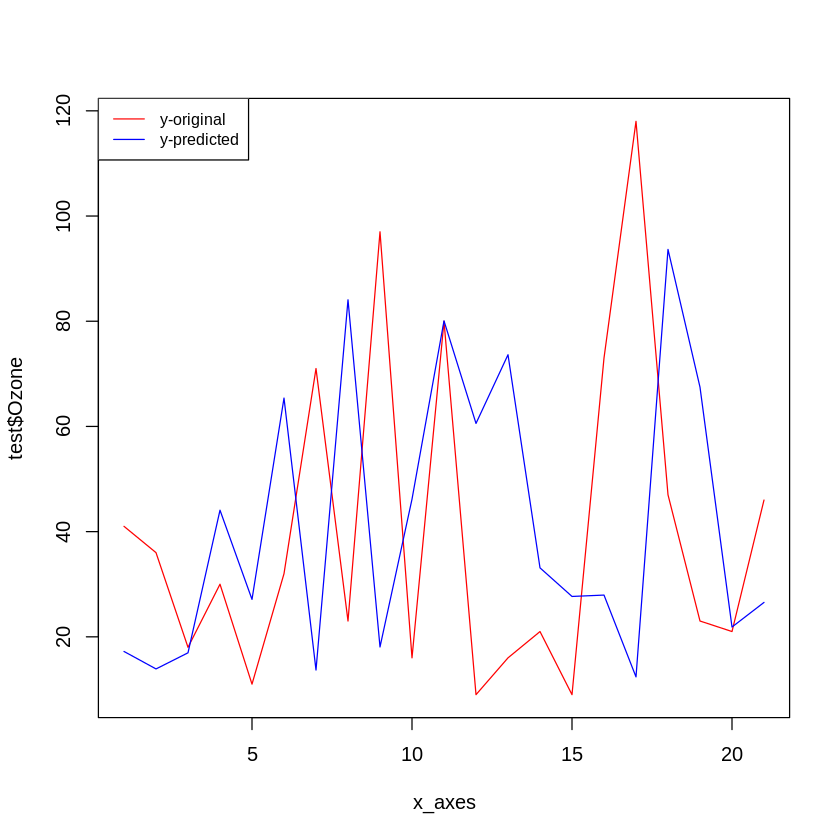

In [ ]:
x_axes =seq(1:length(predict_1))
plot(x_axes,test$Ozone,type='l',col="red")
lines(x_axes,predict_1,col = "blue")
legend("topleft",legend=c("y-original","y-predicted"),col=c("red","blue"),lty=1,cex=0.8)